In [66]:
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import arff
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
import time
%matplotlib notebook


data=arff.loadarff(open('./artificial/2d-4c.arff','r'))
data2=np.loadtxt('./dataset_part2/a.data')

listX = []
listY=[]
for point in data[0]:
    listX.append(point[0])
    listY.append(point[1])

#transformation en np.array()
X = []
for point in data[0]:
    X.append([point[0],point[1]])
X=np.array(X)



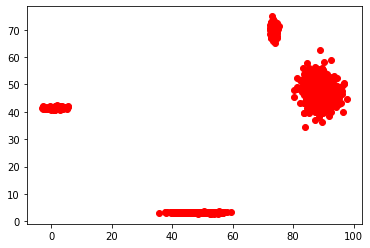

In [33]:
#affichages des datas
plt.plot(listX,listY, 'ro')
plt.show()

<IPython.core.display.Javascript object>


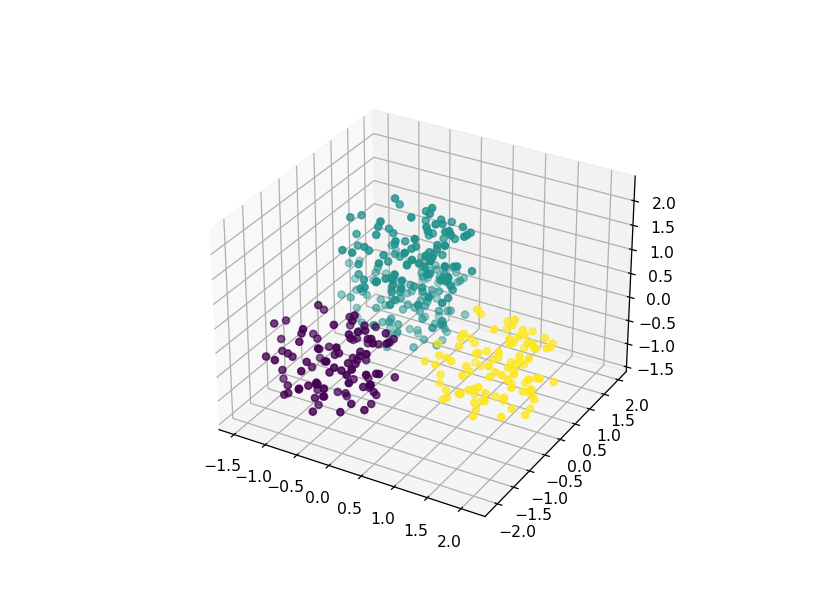

score: 0.37280869296959646


In [61]:
#méthode k-means
kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(data2)
figure=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=kmeans)
print("score:",metrics.silhouette_score(data2, kmeans, metric='euclidean'))

<IPython.core.display.Javascript object>


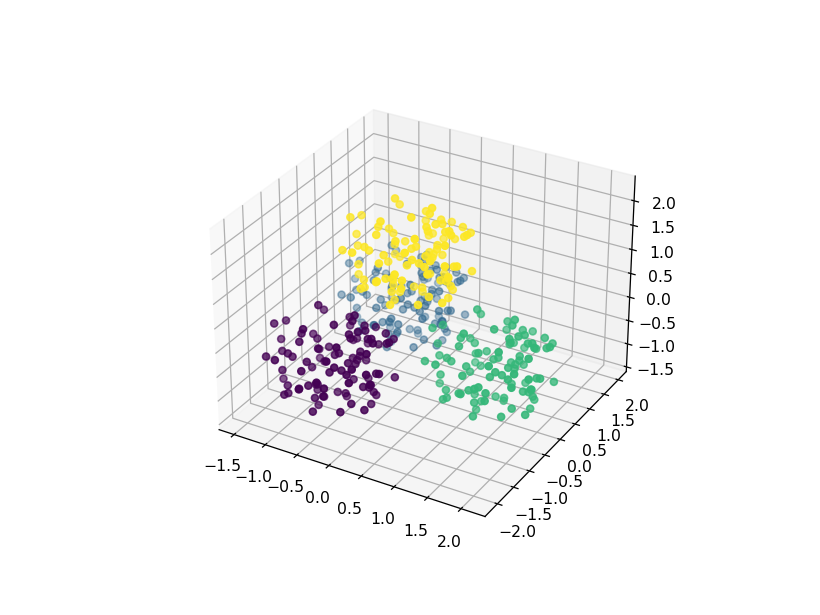

métrique: 0.5057889289788572
nombre de cluster: 4
temps: 23.060959577560425


In [62]:
#variation des paramètres et calculs du score sur kMeans
find = False
nb_cluster = 2
metric_best = 0
limit=100
iteration = 0

start=time.time()

while(nb_cluster < limit):
    kmeans = KMeans(n_clusters=nb_cluster, random_state=0).fit_predict(data2)
    find_metric = metrics.silhouette_score(data2, kmeans, metric='euclidean')
    if find_metric > metric_best:
        metric_best=find_metric
        best_nb_cluster= nb_cluster
        best_kmeans = kmeans
    nb_cluster+=1
    
end=time.time() 

#plt.subplot(221)
#plt.scatter(X[:, 0], X[:, 1], c=best_kmeans)

figure=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=best_kmeans)

print("métrique:",metric_best)
print("nombre de cluster:",best_nb_cluster)
print("temps:", end-start)

score: 0.3991654763579254


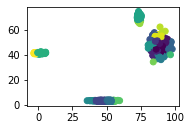

In [36]:
#méthode agglomerate-clustering
clustering = AgglomerativeClustering(n_clusters=20,linkage='complete').fit_predict(X)
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=clustering)
print("score:",metrics.silhouette_score(X, clustering, metric='euclidean'))

<IPython.core.display.Javascript object>


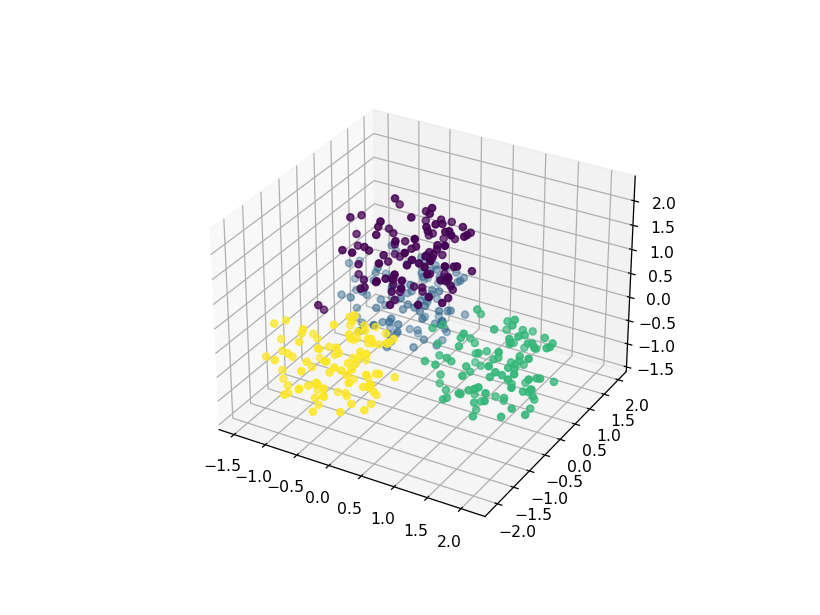

métrique: 0.5010021884877641
nombre de cluster: 4
temps: 1.0321087837219238


In [63]:
#variation des paramètres et calculs du score sur clustering-agglomerate
find = False
nb_cluster = 2 #on commence à deux clusters ou le calcul du score ne fonctionne pas
metric_best = -1
limit=100
start=time.time()

while(nb_cluster<limit):
    clustering = AgglomerativeClustering(n_clusters=nb_cluster,linkage='complete').fit_predict(data2)
    find_metric = metrics.silhouette_score(data2, clustering, metric='euclidean')
    if find_metric > metric_best:
        metric_best=find_metric
        best_clustering = clustering
        best_nb_cluster = nb_cluster
    nb_cluster+=1
end=time.time()

figure=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=best_clustering)
print("métrique:",metric_best)
print("nombre de cluster:",best_nb_cluster)
print("temps:", end-start)


score: -0.08974942096497229


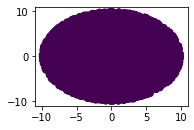

In [7]:
#méthode DBSCAN
clustering = DBSCAN(eps=0.05, min_samples=4).fit_predict(X)
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=clustering)
print("score:",metrics.silhouette_score(X, clustering, metric='euclidean'))

In [51]:
#variation des paramètres et calculs du score sur DBSCAN
find_eps = False
metric_best = -1
eps_max = 0.06
limite=40

start=time.time()
while():
    clustering = DBSCAN(eps=eps_max, min_samples=4).fit(X)
    n_clusters = len(set(clustering.labels_))
    #check du nombre de cluster pour le calcul du score
    if(n_clusters !=1):
        clustering_to_plot = DBSCAN(eps=eps_max, min_samples=4).fit_predict(data2)
        find_metric = metrics.silhouette_score(data2, clustering_to_plot, metric='euclidean')
        if find_metric > metric_best:
            metric_best=find_metric
            best_clustering = clustering_to_plot
            eps_max = eps_max-0.01
        else:
            find_eps=True
    else:
        eps_max=eps_max-0.01

end=time.time()

figure=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=kmeans)
print("métrique:",metric_best)
print("nombre de cluster:",nb_cluster-1)
print("temps:", end-start)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

score: 0.010015400396754748


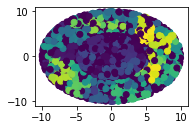

In [14]:
#méthode HDBSCAN
clustering = hdbscan.HDBSCAN(min_cluster_size=3).fit_predict(X)
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=clustering)
print("score:",metrics.silhouette_score(X, clustering, metric='euclidean'))

<IPython.core.display.Javascript object>


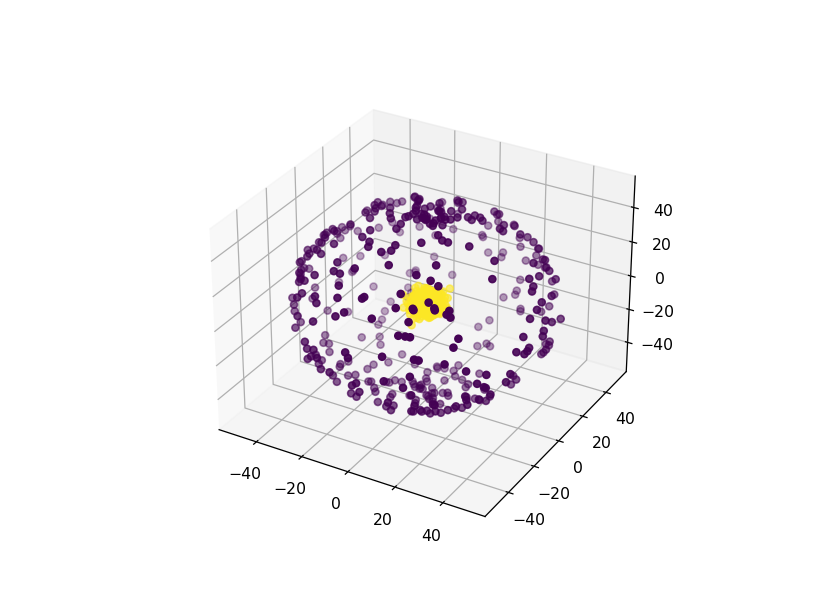

métrique: 0.31149297508558416
Taille minimale du cluster: 19
temps: 0.9550714492797852


In [74]:
#variation des paramètres et calculs du score sur HDBSCAN
find_best = False
metric_best = -1
size_best = 0
cluster_size_min = 2
limit=20

start=time.time()
while(cluster_size_min < limit): 
    clustering = hdbscan.HDBSCAN(min_cluster_size=cluster_size_min, min_samples=10).fit_predict(data2)
    find_metric = metrics.silhouette_score(data2, clustering, metric='euclidean')
    if find_metric >= metric_best:
        metric_best=find_metric
        size_best=cluster_size_min
        best_clustering = clustering
    cluster_size_min = cluster_size_min + 1
        

end=time.time()

figure=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=best_clustering)
print("métrique:",metric_best)
print("Taille minimale du cluster:",size_best)
print("temps:", end-start)